In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import heapq
import io

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from collections import Counter

df = pd.read_csv("Desktop/column_2C.csv")

df.head()

,PI,PT,LLA,SS,PR,GOS,CLASS
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


In [156]:
df['feature']=df['CLASS'].map({'AB':1,'NO':0})


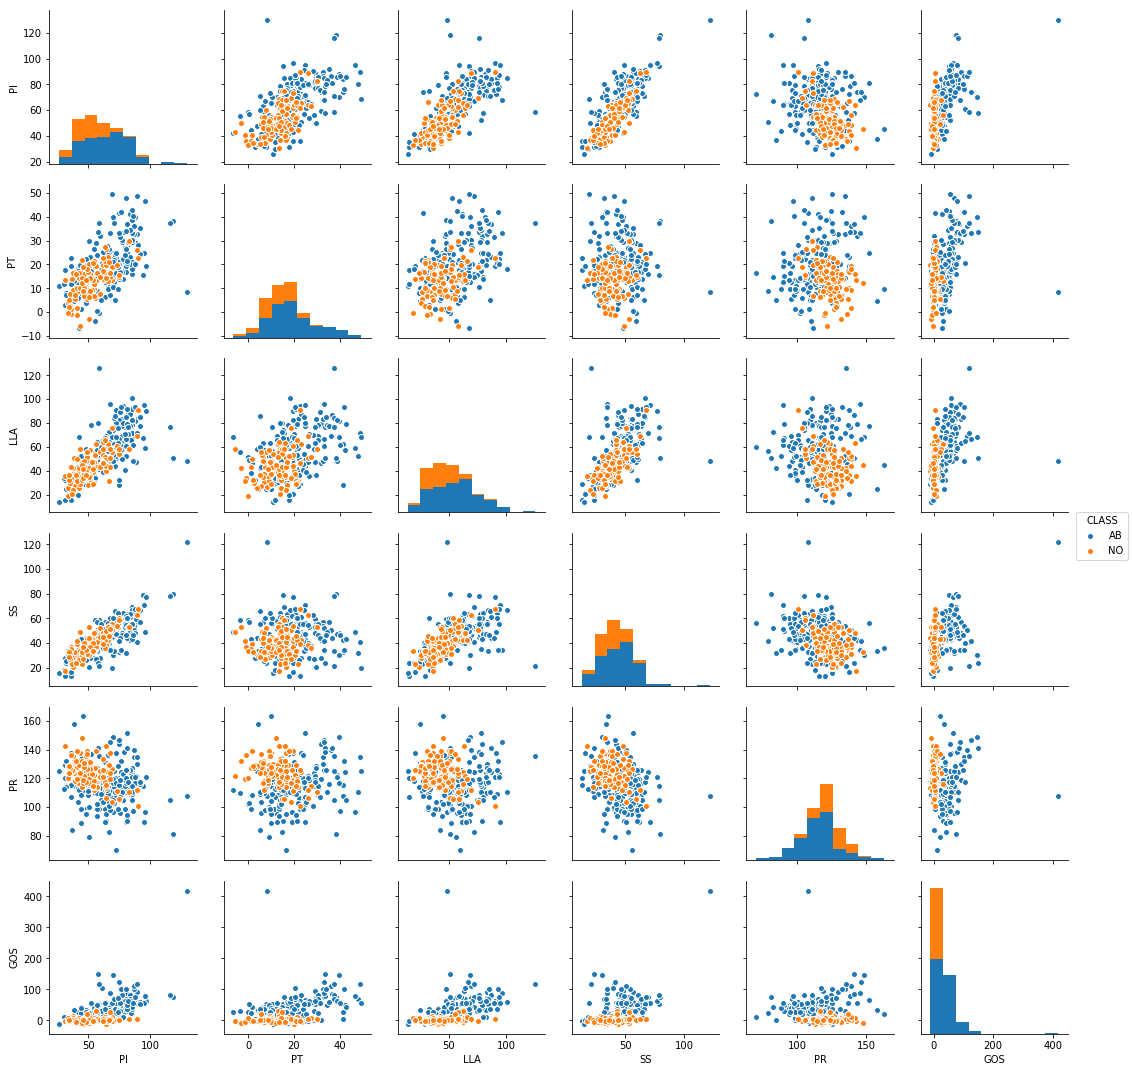

In [284]:
#scatterplot and boxplot

sns.pairplot(df,hue = 'CLASS')
plt.show()

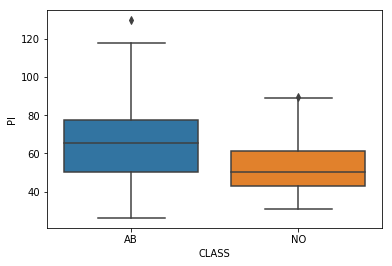

In [278]:
sns.boxplot(x='CLASS',y = 'PI',data = df)
plt.show()

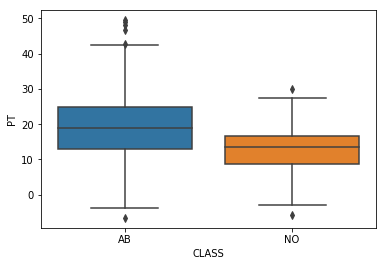

In [279]:
sns.boxplot(x='CLASS',y = 'PT',data = df)
plt.show()

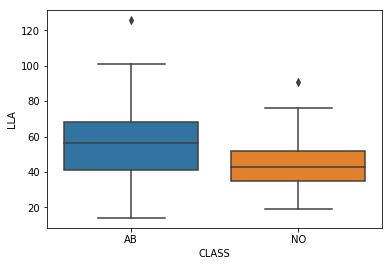

In [280]:
sns.boxplot(x='CLASS',y = 'LLA',data = df)
plt.show()

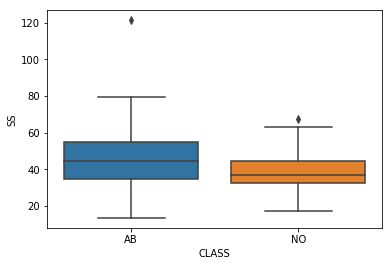

In [281]:
sns.boxplot(x='CLASS',y = 'SS',data = df)
plt.show()

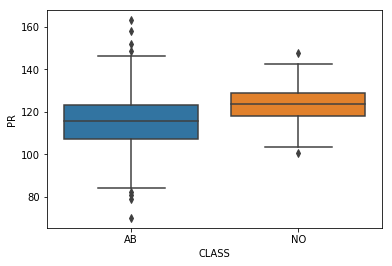

In [282]:
sns.boxplot(x='CLASS',y = 'PR',data = df)
plt.show()

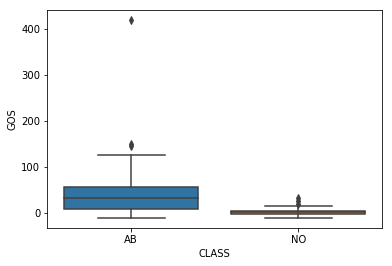

In [283]:
sns.boxplot(x='CLASS',y = 'GOS',data = df)
plt.show()

In [164]:
#split data

trainAB=df[df['CLASS']=='AB'].iloc[:140,:]
trainNO=df[df['CLASS']=='NO'].iloc[:70,:]
train=pd.concat([trainAB,trainNO])
train

,PI,PT,LLA,SS,PR,GOS,CLASS,feature
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB,1
1,39.06,10.06,25.02,29.00,114.41,4.56,AB,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB,1
3,69.30,24.65,44.31,44.64,101.87,11.21,AB,1
4,49.71,9.65,28.32,40.06,108.17,7.92,AB,1
5,40.25,13.92,25.12,26.33,130.33,2.23,AB,1
6,53.43,15.86,37.17,37.57,120.57,5.99,AB,1
7,45.37,10.76,29.04,34.61,117.27,-10.68,AB,1
8,43.79,13.53,42.69,30.26,125.00,13.29,AB,1
9,36.69,5.01,41.95,31.68,84.24,0.66,AB,1


In [165]:
testAB=df[df['CLASS']=='AB'].iloc[140:,:]
testNO=df[df['CLASS']=='NO'].iloc[70:,:]
test=pd.concat([testAB,testNO])
test


,PI,PT,LLA,SS,PR,GOS,CLASS,feature
140,69.56,15.40,74.44,54.16,105.07,29.70,AB,1
141,89.50,48.90,72.00,40.60,134.63,118.35,AB,1
142,85.29,18.28,100.74,67.01,110.66,58.88,AB,1
143,60.63,20.60,64.54,40.03,117.23,104.86,AB,1
144,60.04,14.31,58.04,45.73,105.13,30.41,AB,1
145,85.64,42.69,78.75,42.95,105.14,42.89,AB,1
146,85.58,30.46,78.23,55.12,114.87,68.38,AB,1
147,55.08,-3.76,56.00,58.84,109.92,31.77,AB,1
148,65.76,9.83,50.82,55.92,104.39,39.31,AB,1
149,79.25,23.94,40.80,55.30,98.62,36.71,AB,1


In [166]:
#(c)i

K=[]
Errortest=[]
Errortrain=[]
for k in range(1,len(train),3):
    K.append(k)
    neighbor=KNeighborsClassifier(n_neighbors=k)
    neighbor.fit(train.iloc[:,:6],train.loc[:,'feature'])
    predtesty=neighbor.predict(test.iloc[:,:6])
    predtrainy=neighbor.predict(train.iloc[:,:6])
    cmtest=confusion_matrix(test.loc[:,'feature'],predtesty)
    cmtrain=confusion_matrix(train.loc[:,'feature'],predtrainy)
    errortest=((cmtest[0,1]+cmtest[1,0])/len(test))
    errortrain=((cmtrain[0,1]+cmtrain[1,0])/len(train))

    Errortest.append(errortest)
    Errortrain.append(errortrain)
    
    

In [173]:
#(c)ii

table=pd.DataFrame({'K':K,'test error':Errortest,'train error':Errortrain})

In [174]:
plt.figure
plt.plot(table['K'],table['test error'])
plt.plot(table['K'],table['train error'])
plt.title('train error v.s. test error')
plt.xlabel('K')
                

In [127]:
# From the plot above, we could know that the optimal k is 4

neighbor=KNeighborsClassifier(n_neighbors=4)
    neighbor.fit(train.iloc[:,:6],train.loc[:,'feature'])
    predtesty=neighbor.predict(test.iloc[:,:6])
    predtrainy=neighbor.predict(train.iloc[:,:6])
    cmtest=confusion_matrix(test.loc[:,'feature'],predtesty)
    cmtrain=confusion_matrix(train.loc[:,'feature'],predtrainy)


TN=cmtest[0,0]/cmtest[0,0]+cmtest[0,1]
TP=cmtest[1,1]/cmtest[1,0]+cmtest[1,1]
precision=cmtest[1,1]/cmtest[0,1]+cmtest[1,1]
F=(1+0.3**2)*(TP+precision)/(0.3**2*pecision+TP)

IndentationError: unexpected indent (<ipython-input-127-ab6c0e4abc7e>, line 4)

In [175]:
# From the plot above, we could know that the optimal k is 4

neighbor=KNeighborsClassifier(n_neighbors=4)
neighbor.fit(train.iloc[:,:6],train.loc[:,'feature'])
predtesty=neighbor.predict(test.iloc[:,:6])
predtrainy=neighbor.predict(train.iloc[:,:6])
cmtest=confusion_matrix(test.loc[:,'feature'],predtesty)
cmtrain=confusion_matrix(train.loc[:,'feature'],predtrainy)

TN=cmtest[0,0]/cmtest[0,0]+cmtest[0,1]
TP=cmtest[1,1]/cmtest[1,0]+cmtest[1,1]
precision=cmtest[1,1]/cmtest[0,1]+cmtest[1,1]
F=(1+0.3**2)*(TP+precision)/(0.3**2*precision+TP)
    
TN

6.0

In [176]:
TP

138.0

In [177]:
precision

82.8

In [178]:
F

1.6546489563567364

In [191]:
#(c)iii
K=[]
N=[]
Errortest=[]
Errortrain=[]

for n in range(10,211,10):
    trainAB=df[df['CLASS']=='AB'].iloc[:n-round(n/3),:]
    trainNO=df[df['CLASS']=='NO'].iloc[:round(n/3),:]
    train=pd.concat([trainAB,trainNO])
    testAB=df[df['CLASS']=='AB'].iloc[n-round(n/3):,:]
    testNO=df[df['CLASS']=='NO'].iloc[round(n/3):,:]
    test=pd.concat([testAB,testNO])
    
    
for k in range(1,n,5):
    neighbor=KNeighborsClassifier(n_neighbors=k)
    neighbor.fit(train.iloc[:,:6],train.loc[:,'feature'])
    predtesty=neighbor.predict(test.iloc[:,:6])
    predtrainy=neighbor.predict(train.iloc[:,:6])
    cmtest=confusion_matrix(test.loc[:,'feature'],predtesty)
    cmtrain=confusion_matrix(train.loc[:,'feature'],predtrainy)
    errortest=((cmtest[0,1]+cmtest[1,0])/len(test))
    errortrain=((cmtrain[0,1]+cmtrain[1,0])/len(train))
    K.append(k)
    N.append(n)
    Errortest.append(errortest)
    Errortrain.append(errortrain)
    
    

In [195]:
tableadjust=pd.DataFrame({'train size':N,'K':K,'test error':Errortest,'train error':Errortrain})
tableadjust[(tableadjust['test error']==min(tableadjust['test error']))]

,K,test error,train error,train size
1,6,0.08,0.147619,210


In [212]:
#(d)

#i Minkowski Distance

#a.Manhattan Distance

#i
K=[]
Errortest=[]
Errortrain=[]

trainAB=df[df['CLASS']=='AB'].iloc[:140,:]
trainNO=df[df['CLASS']=='NO'].iloc[:70,:]
train=pd.concat([trainAB,trainNO])
testAB=df[df['CLASS']=='AB'].iloc[140:,:]
testNO=df[df['CLASS']=='NO'].iloc[70:,:]
test=pd.concat([testAB,testNO])

for k in range(1,197,5):
    neighbor=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=1)
    neighbor.fit(train.iloc[:,:6],train.loc[:,'feature'])
    predtesty=neighbor.predict(test.iloc[:,:6])
    predtrainy=neighbor.predict(train.iloc[:,:6])
    cmtest=confusion_matrix(test.loc[:,'feature'],predtesty)
    cmtrain=confusion_matrix(train.loc[:,'feature'],predtrainy)
    errortest=((cmtest[0,1]+cmtest[1,0])/len(test))
    errortrain=((cmtrain[0,1]+cmtrain[1,0])/len(train))
    K.append(k)
    Errortest.append(errortest)
    Errortrain.append(errortrain)
    
table_min=pd.DataFrame({'K':K,'test error':Errortest,'train error':Errortrain})
table_min[(table_min['test error']==min(table_min['test error']))]

#optimal k is 6

,K,test error,train error
1,6,0.11,0.138095
2,11,0.11,0.142857
5,26,0.11,0.166667


In [218]:

#ii select p
I=[]
Errortest=[]
Errortrain=[]


for i in range(1,11):
    I.append(i/10)
    neighbor=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=10**(i/10))
    neighbor.fit(train.iloc[:,:6],train.loc[:,'feature'])
    predtesty=neighbor.predict(test.iloc[:,:6])
    predtrainy=neighbor.predict(train.iloc[:,:6])
    cmtest=confusion_matrix(test.loc[:,'feature'],predtesty)
    cmtrain=confusion_matrix(train.loc[:,'feature'],predtrainy)
    errortest=((cmtest[0,1]+cmtest[1,0])/len(test))
    errortrain=((cmtrain[0,1]+cmtrain[1,0])/len(train))
    K.append(k)
    Errortest.append(errortest)
    Errortrain.append(errortrain)
    
table_min1=pd.DataFrame({'log10p':I,'test error':Errortest,'train error':Errortrain})
table_min1[(table_min1['test error']==min(table_min1['test error']))]



,log10p,test error,train error
0,0.1,0.3,0.333333
1,0.2,0.3,0.333333
2,0.3,0.3,0.333333
3,0.4,0.3,0.333333
4,0.5,0.3,0.333333
5,0.6,0.3,0.333333
6,0.7,0.3,0.333333
7,0.8,0.3,0.333333
8,0.9,0.3,0.333333
9,1.0,0.3,0.333333


In [276]:
#Mahalanobis Distance

K=[]
Errortest=[]
Errortrain=[]

trainAB=df[df['CLASS']=='AB'].iloc[:140,:]
trainNO=df[df['CLASS']=='NO'].iloc[:70,:]
train=pd.concat([trainAB,trainNO])
testAB=df[df['CLASS']=='AB'].iloc[140:,:]
testNO=df[df['CLASS']=='NO'].iloc[70:,:]
test=pd.concat([testAB,testNO])
x=np.array(train.iloc[:,:6])
y=np.array(test.iloc[:,:6])
test1=np.cov(df.iloc[:,:6].T)
train1=np.cov(train.iloc[:,:6].T)
invtest=np.linalg.inv(test1)
invtrain=np.linalg.inv(train1)

for k in range(1,197,5):
    testfeature=[]
    trainfeature=[]
    for j in range(len(test)):
        distances=[]
        for i in range(len(train)):
            distances.append(np.sqrt(np.dot(np.dot(x[i]-y[j],invtest),(x[i]-y[j]).T)))
        kmin=heapq.nsmallest(k,distances)
        index=[]
        for distance in kmin:
            index.append(distances.index(distance))
        knn=train.iloc[index,7]
        testfeature.append(Counter(knn).most_common()[0][0])
    for j in range(len(train)):
        distance=[]
        for i in range (len(train)):
            distances.append(np.sqrt(np.dot(np.dot(x[i]-y[j],invtrain),(x[i]-y[j]).T)))
        
        kmin=heapq.nsmallest(k,distances)
        index=[]
        for distance in kmin:
            index.append(distances,index(distance))
        knn=train.iloc[index,7]
        trainfeature.append(Counter(knn).most_common()[0][0])
        cmtest=confusion_matrix(test.loc[:,'feature'],testfeature)
        cmtrain=confusion_matrix(train.loc[:,'feature'],trainfeature)
        
        errortest=((cmtest[0,1]+cmtest[1,0])/len(test))
        errortrain=((cmtrain[0,1]+cmtrain[1,0])/len(train))
        K.append(k)
        Errortest.append(errortest)
        Errortrain.append(errortrain)
        
table_maha=pd.DataFrame({'K':K,'test error':Errortest,'train error':Errortrain})
table_min1[(table_maha['test error']==min(table_maha['test error']))]

        
       
          
                 


IndexError: single positional indexer is out-of-bounds

In [ ]:
#(f)

#Until what I did now, the lowest training error is 0.138095